## Overview
To compare the means of two independent samples of internval or ratio data (assuming the samples are from normally distributed populations having equal variance) we can do a t-test. But what if you have more than two groups that you want to compare? You could do multiple t-tests, one for each pairing of groups. But this approach would increase the likelhood of experiencing a type-1 error, that is, of rejecting the null hypothesis when you should not have done so (false positive). A better approach is to do an analysis of variance (ANOVA) test. Think of ANOVA as testing all groups simultaneously and looking for statistical evidence that at least one of the groups is different than any of the others. We will focus on one-way ANOVA were there is only one factor that is different between groups. 

After this notebook you will know:
* how to conduct one-way ANOVA (analysis of variance) between multiple groups of interval or ratio data.
* how to do a Tukey's range test.

### About the Data
Name: reddye40.csv

Title: Red Dye 40 and Cancer in Mice

Source: Journal Natl. Cancer Inst., Vol. 66, p 197-212

Description: S.W. Laagakos and F. Mosteller of Harvard University fed mice different doses of red dye number 40 and recorded the time of death in weeks. Results for female mice, dosage and time of death are shown in the data:
* X1 = time of death for control group
* X2 = time of death for group with low dosage
* X3 = time of death for group with medium dosage
* X4 = time of death for group with high dosage

The following cell will import the red dye 40 cancer data using pandas. The data is formated as a CSV (comma-separated-values) file. Such a file could be opend in Excel but here we simply load the file into a pandas data structure called a dataframe and print out the first couple rows of the dataframe.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # some useful stuff
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/reddye40.csv"
reddye = pd.read_csv(url)

In [2]:
reddye

,X1 control,X2 low dose,X3 medium dose,X4 high dose
0,70,49.0,30.0,34.0
1,77,60.0,37.0,36.0
2,83,63.0,56.0,48.0
3,87,67.0,65.0,48.0
4,92,70.0,76.0,65.0
5,93,74.0,83.0,91.0
6,100,77.0,87.0,98.0
7,102,80.0,90.0,102.0
8,102,89.0,94.0,NaN
9,103,NaN,97.0,NaN


### One-Way ANOVA Hypothesis Testing

ANOVA allows us to test the null hypothesis that their is no difference between the means of different groups in a study. For the red dye 40 data the null hypothesis would be that there is no difference between the mean time of death in weeks between mice receiving no dose (control), a low dose, a medium dose, or a high dose of red dye 40.
* H<sub>0</sub>: x1_bar = x2_bar = x3_bar = x4_bar at &alpha; = 0.05
* H<sub>A</sub>: The means are not all equal. That is, at least one of the means is different from the rest. 

The test statistic for ANOVA is called the F-statistic and is defined as the ratio of mean squared error between groups divided by the mean squared error within groups. 

F = MSB/MSE

where

MSB = SUM(nj(xj_bar - x_bar)^2) / (k-1) 

* The sum is taken over all k groups, nj is the number of data values in group j, xj_bar is the mean of group j, x_bar is the grand mean, which is the mean of all data values in all groups. The degrees of freedom between groups is k-1

MSE = SUM(SUM(x-xj_bar)^2) / (N-k)

* The inner sum is taken over all data values in group j and the other sum is taken over all k groups. The degrees of freedom within groups is N-k, where N is the total number of data values in all groups.

The F-critical value for the stated significance level can be found in F-tables like [these](http://www.socr.ucla.edu/applets.dir/f_table.html) or using a calculator like [this one](https://www.danielsoper.com/statcalc/calculator.aspx?id=4). There is a different F-table for each significance level. The columns are for different between group degrees of freedom (k-1) and the rows are for different within group degrees of freedom (N-k). For the red dye data dfB = k-1 = 3 and dfW = N - k = 38 giving a F-critical value of 2.85174134.

Below the F-statistic is calculated using the formulas above and again using a built in python function that is much easier to use.

(NOTE: ANOVA assumes that the data in each group is normally distributed and the various groups have uniform variance. In practice, the ANOVA test works well if the data is decently normal and the smallest group variance is no more than 3 times smaller than the largest group variance. (More arbitrary rules?))

In [10]:
# FIRST LET'S PULL OUT THE FOUR GROUPS. Notice that the number of mice in each sample is different.
groups = ['X1 control', 'X2 low dose', 'X3 medium dose', 'X4 high dose']
x1 = reddye[reddye[groups[0]]>0][groups[0]]
x2 = reddye[reddye[groups[1]]>0][groups[1]]
x3 = reddye[reddye[groups[2]]>0][groups[2]]
x4 = reddye[reddye[groups[3]]>0][groups[3]]

# NOW LET'S FIND THE SIZE OF EACH GROUP ...
n1 = len(x1)
n2 = len(x2)
n3 = len(x3)
n4 = len(x4)
N = n1+n2+n3+n4 # 38 data values in all groups

# AND CALCULATE dfB and dfW
k = 4 # 4 groups
dfB = k-1
dfW = N-k

In [11]:
# NOW CALCULATE THE GRAND MEAN ...
x_bar = (n1*x1.mean() + n2*x2.mean() + n3*x3.mean() + n4*x4.mean())/N
print(x_bar)

75.55263157894737


In [12]:
# THE SUM OF SQUARES BETWEEN GROUPS ...
SSB = n1*(x1.mean()-x_bar)**2 + n2*(x2.mean()-x_bar)**2 + n3*(x3.mean()-x_bar)**2 + n4*(x4.mean()-x_bar)**2
print(SSB)
# AND THE SUM OF SQUARES WITHIN GROUPS ...
SSW = sum(((x1 - x1.mean()))**2) + sum(((x2 - x2.mean()))**2) + sum(((x3 - x3.mean()))**2) + sum(((x4 - x4.mean()))**2)
print(SSW)

# NOW CALCULATE THE F-STATISTIC
F = (SSB/dfB)/(SSW/dfW)
print("F = ", F)

F, p = stats.f_oneway(x1, x2, x3, x4)
print("F = ", F, " p = ", p)

4051.9603934077604
12937.4343434
F =  3.54956141789
F =  3.54956141789  p =  0.0244718445337


### Intepreting the Result
Since the F-statistic is greater than F-critical we reject the null and accept the alternative hypothesis. The means of the groups are not the same. But this doesn't tell us which mean or means are different. To determine this we could proceed to do independent sample t-tests or explore the data some other way. Let's do a test called Tukey's range test.

In [43]:
# LET'S JUST LOOK AT SOME SUMMARY STATISTICS FOR EACH GROUP
reddye.describe()

,X1 control,X2 low dose,X3 medium dose,X4 high dose
count,11.000000,9.000000,10.000000,8.000000
mean,91.363636,69.888889,71.500000,65.250000
std,11.011564,11.857956,23.773234,28.064976
min,70.000000,49.000000,30.000000,34.000000
25%,85.000000,63.000000,58.250000,45.000000
50%,93.000000,70.000000,79.500000,56.500000
75%,101.000000,77.000000,89.250000,92.750000
max,103.000000,89.000000,97.000000,102.000000


group1,group2,meandiff,lower,upper,reject
x1,x2,-21.4747,-45.1541,2.2046,False
x1,x3,-19.8636,-42.8826,3.1553,False
x1,x4,-26.1136,-50.5934,-1.6339,True
x2,x3,1.6111,-22.5951,25.8174,False
x2,x4,-4.6389,-30.2383,20.9605,False
x3,x4,-6.25,-31.2398,18.7398,False


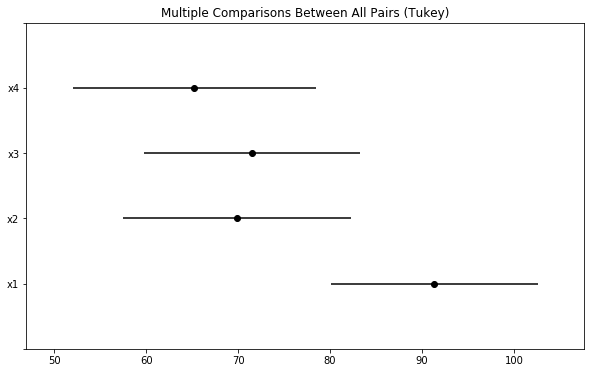

In [39]:
# POP THE DATA INTO A NEW STRUCTURE SUITABLE FOR THE TUKEY FUNCTION
data = np.array(list(x1.append(x2).append(x3).append(x4,ignore_index=True)))
group_labels = np.array(['x1']*n1 + ['x2']*n2 + ['x3']*n3 + ['x4']*n4)


from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data, groups=group_labels, alpha=0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary